In [2]:
import copernicusmarine as cms

In [2]:
import os

In [ ]:
cms.login(username='rslater')

In [13]:
catalogue = cms.describe()
catalogue

Fetching catalog: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.93s/it]


{'products': [{'title': 'Antarctic Sea Ice Extent from Reanalysis',
   'product_id': 'ANTARCTIC_OMI_SI_extent',
   'thumbnail_url': 'https://documentation.marine.copernicus.eu/IMG/ANTARCTIC_OMI_SI_extent.png',
   'digital_object_identifier': '10.48670/moi-00186',
   'sources': ['Numerical models'],
   'processing_level': None,
   'production_center': 'Mercator Océan International'},
  {'title': 'Antarctic Monthly Sea Ice Extent from Observations Reprocessing',
   'product_id': 'ANTARCTIC_OMI_SI_extent_obs',
   'thumbnail_url': 'https://documentation.marine.copernicus.eu/IMG/ANTARCTIC_OMI_SI_extent_obs.png',
   'digital_object_identifier': '10.48670/moi-00187',
   'sources': ['Satellite observations'],
   'processing_level': None,
   'production_center': 'MET Norway'},
  {'title': 'Arctic Ocean Biogeochemistry Analysis and Forecast',
   'product_id': 'ARCTIC_ANALYSISFORECAST_BGC_002_004',
   'thumbnail_url': 'https://mdl-metadata.s3.waw3-1.cloudferro.com/metadata/thumbnails/ARCTIC_ANALY

In [16]:
import pandas as pd

In [35]:
df = pd.DataFrame.from_dict(catalogue['products'])
product = df.loc[df['title'].isin(['Global Ocean Physics Reanalysis'])]
display(product)
product = product.squeeze()

,title,product_id,thumbnail_url,digital_object_identifier,sources,processing_level,production_center
45,Global Ocean Physics Reanalysis,GLOBAL_MULTIYEAR_PHY_001_030,https://mdl-metadata.s3.waw3-1.cloudferro.com/...,10.48670/moi-00021,[Numerical models],Level 4,Mercator Océan International


In [37]:
from IPython.display import Image
Image(url=product['thumbnail_url']) 

In [40]:
cms.open_dataset?

Signature:
cms.open_dataset(
    dataset_url: Optional[str] = None,
    dataset_id: Optional[str] = None,
    dataset_version: Optional[str] = None,
    dataset_part: Optional[str] = None,
    username: Optional[str] = None,
    password: Optional[str] = None,
    variables: Optional[List[str]] = None,
    minimum_longitude: Optional[float] = None,
    maximum_longitude: Optional[float] = None,
    minimum_latitude: Optional[float] = None,
    maximum_latitude: Optional[float] = None,
    minimum_depth: Optional[float] = None,
    maximum_depth: Optional[float] = None,
    vertical_dimension_as_originally_produced: bool = True,
    start_datetime: Union[datetime.datetime, str, NoneType] = None,
    end_datetime: Union[datetime.datetime, str, NoneType] = None,
    subset_method: Literal['nearest', 'strict'] = 'nearest',
    service: Optional[str] = None,
    credentials_file: Union[pathlib.Path, str, NoneType] = None,
    overwrite_metadata_cache: bool = False,
    no_metadata_cache: bo

In [ ]:
ds = cms.open_dataset(dataset_id = 'cmems_mod_glo_phy_my_0.083deg-climatology_P1M-m')
ds

In [57]:
subset = ds.thetao.isel(depth=10).sel(time='1993-01-01T00:00:00.000000000').sel(latitude=slice(-90,-60))
subset

<xarray.DataArray 'thetao' (latitude: 241, longitude: 4320)> Size: 8MB
[1041120 values with dtype=float64]
Coordinates:
    depth      float32 4B 15.81
  * latitude   (latitude) float32 964B -80.0 -79.92 -79.83 ... -60.08 -60.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
    time       datetime64[ns] 8B 1993-01-01
Attributes:
    cell_methods:   area: mean
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius
    units:          degrees_C

In [58]:
_subset = subset.load()

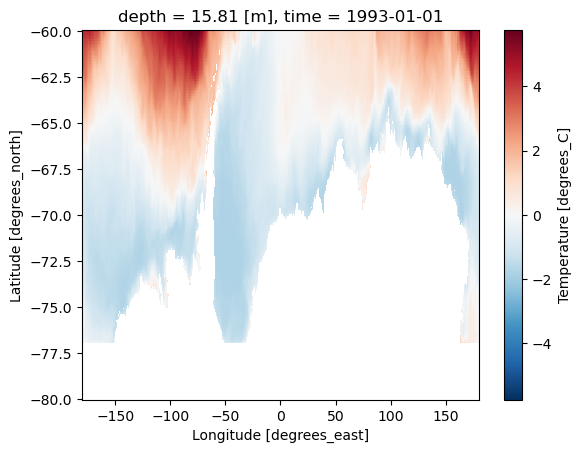

In [61]:
_subset.plot.imshow()

In [65]:
cms.subset(dataset_id = 'cmems_mod_glo_phy_my_0.083deg-climatology_P1M-m',
    variables = ['thetao'],
    minimum_latitude = -80,
    maximum_latitude = -60,
    output_filename = 'test.zarr',
    file_format = 'zarr',)

INFO - 2024-11-26T16:26:38Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-11-26T16:26:38Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-11-26T16:26:40Z - Service was not specified, the default one was selected: "arco-time-series"
INFO - 2024-11-26T16:26:41Z - Downloading using service arco-time-series...
INFO - 2024-11-26T16:26:42Z - <xarray.Dataset> Size: 5GB
Dimensions:    (depth: 50, latitude: 241, longitude: 4320, time: 12)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 964B -80.0 -79.92 -79.83 ... -60.08 -60.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 96B 1993-01-01 1993-02-01 ... 1993-12-01
Data variables:
    thetao     (time, depth, latitude, longitude) float64 5GB dask.array<chunksize=(12, 4, 128, 128), meta=np.ndarray>
Attributes: (12/17)
    CDI:    

  Y


INFO - 2024-11-26T16:26:55Z - Writing to local storage. Please wait...


  0%|          | 0/7686 [00:00<?, ?it/s]

INFO - 2024-11-26T16:27:04Z - Successfully downloaded to test.zarr


PosixPath('test.zarr')

In [13]:
import xarray as xr
ds = xr.open_zarr('test.zarr').isel(depth=10, time=0)

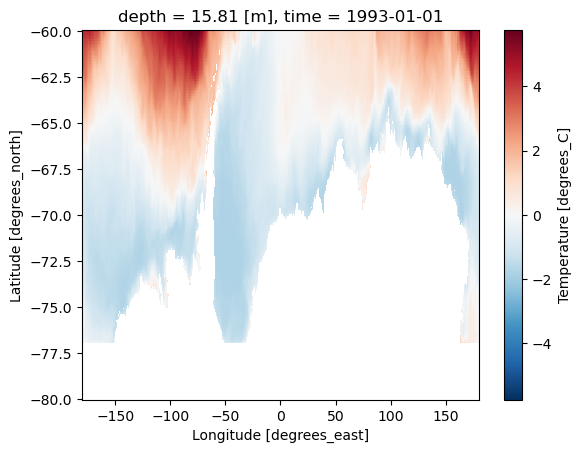

In [14]:
ds.thetao.plot.imshow()

In [15]:
import matplotlib.pyplot as plt

In [16]:
import cartopy.crs as ccrs
epsg_3031 = ccrs.Stereographic(central_latitude=-90, true_scale_latitude=-71)

In [24]:
ds = ds.rio.write_crs('epsg:4326')
ds

<xarray.Dataset> Size: 8MB
Dimensions:      (latitude: 241, longitude: 4320)
Coordinates:
    depth        float32 4B 15.81
  * latitude     (latitude) float32 964B -80.0 -79.92 -79.83 ... -60.08 -60.0
  * longitude    (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
    time         datetime64[ns] 8B 1993-01-01
    spatial_ref  int64 8B 0
Data variables:
    thetao       (latitude, longitude) float64 8MB dask.array<chunksize=(128, 128), meta=np.ndarray>
Attributes: (12/17)
    CDI:                           Climate Data Interface version 1.9.3 (http...
    CDO:                           Climate Data Operators version 1.9.3 (http...
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    copernicusmarine_version:      1.3.4
    ...                            ...
    product:                       GLOBAL_REANALYSIS_001_030
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLORYS12V1
    title:                         Monthly climatology fields for product GLO...

In [25]:
ds = ds.rio.reproject(epsg_3031)

In [27]:
ds.rio.to_raster('./test.tif')

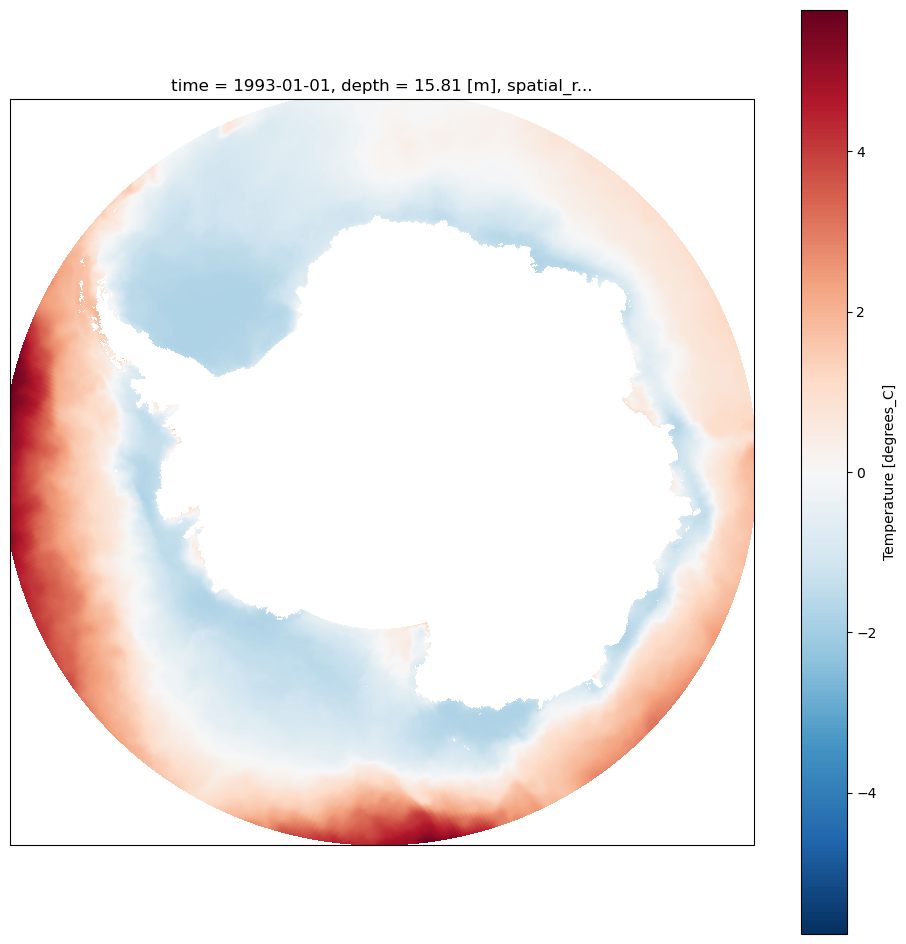

In [26]:
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=epsg_3031)
ds.thetao.plot.imshow(ax=ax)
ax.set_extent([-180, 180, -90, -60], crs = ccrs.PlateCarree())

In [ ]:
# %% ../02_plot.ipynb 16
def plot_acceleration(da: xr.DataArray, # xarray DataArray 
                      ax=None, #figure axis to plot to
                      vmin:float or bool=None, # colourbar minimum data value
                      vmax:float or bool=None, # colourbar maximum data value
                      cmap:str="RdBu_r", # data colourmap
                      cbar_label:str=r"Acceleration (m a$^{-2}$)", #colourbar label text
                      gridlines:bool=False, # add lat lon gridlines to axis
                      coast_and_gl:bool=True, # add coastline and grounding line to axis
                      border:bool=True, # border around data
                      title:str="", # figure title
                      fontsize:int=14
                     ):
    "Plot ice acceleration on top of Antarctic coastline and grounding lines"
    
    if ax is None:
        plt.figure(figsize=(12, 12))
        ax = plt.axes(projection=epsg_3031)

    p995 = np.nanpercentile(da, 99.5) #ds.sel(degree=1).polyfit_coefficients
    if vmin is None:
        vmin = -p995
    if vmax is None:
        vmax = p995
    
    cb = da.plot.imshow( 
        ax=ax,
        cmap=cmap,
        add_colorbar=False,
        vmin=vmin,
        vmax=vmax,
        )
    
    cbar_kwargs={
        # "ax": ax,
        "label": cbar_label,
        "location": "bottom",
        "shrink": 0.9,
        "pad": 0.05,
        "extend":"both"
        }

    cbar = plt.colorbar(cb, ax=ax, **cbar_kwargs)
    cbar.ax.tick_params(labelsize=fontsize)
    cbar.set_label(label=cbar_label, size=fontsize)
    
    if coast_and_gl:
        add_coast_and_gl(ax)
    if gridlines:
        gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
        gl.bottom_labels = False
        gl.left_labels = False
    if border == False:
        ax.axis("off")
    
    plt.title(title, fontsize=fontsize)
    
    return ax